<a href="https://colab.research.google.com/github/vfrantc/incident_detection/blob/main/train_model_ego_accident_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Old code and dataset

In [ ]:
# old example with old dataset
!gdown 1PuXKp8yt9qq0NlROWG7D20TyEIRbGluT

Downloading...
From (original): https://drive.google.com/uc?id=1PuXKp8yt9qq0NlROWG7D20TyEIRbGluT
From (redirected): https://drive.google.com/uc?id=1PuXKp8yt9qq0NlROWG7D20TyEIRbGluT&confirm=t&uuid=e0f3b613-e533-443a-9681-a4bdbc988a56
To: /content/data.zip
100% 10.5G/10.5G [03:21<00:00, 52.0MB/s]


In [ ]:
!git clone https://github.com/vfrantc/incident_detection.git

Cloning into 'incident_detection'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 4), reused 13 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 19.04 KiB | 19.04 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/noaccident/002219/013.jpg  
  inflating: data/train/noaccident/002219/014.jpg  
  inflating: data/train/noaccident/002219/015.jpg  
  inflating: data/train/noaccident/002219/016.jpg  
  inflating: data/train/noaccident/002219/017.jpg  
  inflating: data/train/noaccident/002219/018.jpg  
  inflating: data/train/noaccident/002219/019.jpg  
  inflating: data/train/noaccident/002219/020.jpg  
  inflating: data/train/noaccident/002219/021.jpg  
  inflating: data/train/noaccident/002219/022.jpg  
  inflating: data/train/noaccident/002219/023.jpg  
  inflating: data/train/noaccident/002219/024.jpg  
  inflating: data/train/noaccident/002219/025.jpg  
  inflating: data/train/noaccident/002219/026.jpg  
  inflating: data/train/noaccident/002219/027.jpg  
  inflating: data/train/noaccident/002219/028.jpg  
  inflating: data/train/noaccident/002219/029.jpg  
  inflating: data/train/noaccident/002219/030.jpg  
  inflating: 

# Dataset with CCD

In [ ]:
!gdown 11ErpWQmmV5au2JOQVxwYl3ebtuugdlan
!gdown 1fmcwGhr8JT9YfLUrlcvuCZ3ychi2eyFP
!gdown 13OgrD0-8cKG0X00MlA6JXr0G_JJmHYXg

Downloading...
From (original): https://drive.google.com/uc?id=11ErpWQmmV5au2JOQVxwYl3ebtuugdlan
From (redirected): https://drive.google.com/uc?id=11ErpWQmmV5au2JOQVxwYl3ebtuugdlan&confirm=t&uuid=fcd1d08f-9706-473e-9fcf-a0679827584a
To: /content/Normal.zip
100% 6.45G/6.45G [04:19<00:00, 24.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1fmcwGhr8JT9YfLUrlcvuCZ3ychi2eyFP
From (redirected): https://drive.google.com/uc?id=1fmcwGhr8JT9YfLUrlcvuCZ3ychi2eyFP&confirm=t&uuid=a43a4f06-9230-44b2-9331-26a4ef4f5416
To: /content/Crash-1500.zip
100% 793M/793M [00:35<00:00, 22.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=13OgrD0-8cKG0X00MlA6JXr0G_JJmHYXg
To: /content/Crash-1500.txt
100% 277k/277k [00:00<00:00, 89.2MB/s]


In [ ]:
!cat Crash-1500.txt

000001,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],000285,0000,Day,Normal,Yes
000002,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],000646,0000,Day,Normal,Yes
000003,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],000972,0000,Day,Normal,Yes
000004,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],001257,0000,Day,Normal,Yes
000005,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],000462,0010,Day,Snowy,Yes
000006,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
!unzip Crash-1500.zip

Archive:  Crash-1500.zip
  inflating: 000001.mp4              
  inflating: 000002.mp4              
  inflating: 000003.mp4              
  inflating: 000004.mp4              
  inflating: 000005.mp4              
  inflating: 000006.mp4              
  inflating: 000007.mp4              
  inflating: 000008.mp4              
  inflating: 000009.mp4              
  inflating: 000010.mp4              
  inflating: 000011.mp4              
  inflating: 000012.mp4              
  inflating: 000013.mp4              
  inflating: 000014.mp4              
  inflating: 000015.mp4              
  inflating: 000016.mp4              
  inflating: 000017.mp4              
  inflating: 000018.mp4              
  inflating: 000019.mp4              
  inflating: 000020.mp4              
  inflating: 000021.mp4              
  inflating: 000022.mp4              
  inflating: 000023.mp4              
  inflating: 000024.mp4              
  inflating: 000025.mp4              
  inflating: 000026.mp4  

In [ ]:
!unzip Crash-1500.zip -d crash

Archive:  Crash-1500.zip
  inflating: crash/000001.mp4        
  inflating: crash/000002.mp4        
  inflating: crash/000003.mp4        
  inflating: crash/000004.mp4        
  inflating: crash/000005.mp4        
  inflating: crash/000006.mp4        
  inflating: crash/000007.mp4        
  inflating: crash/000008.mp4        
  inflating: crash/000009.mp4        
  inflating: crash/000010.mp4        
  inflating: crash/000011.mp4        
  inflating: crash/000012.mp4        
  inflating: crash/000013.mp4        
  inflating: crash/000014.mp4        
  inflating: crash/000015.mp4        
  inflating: crash/000016.mp4        
  inflating: crash/000017.mp4        
  inflating: crash/000018.mp4        
  inflating: crash/000019.mp4        
  inflating: crash/000020.mp4        
  inflating: crash/000021.mp4        
  inflating: crash/000022.mp4        
  inflating: crash/000023.mp4        
  inflating: crash/000024.mp4        
  inflating: crash/000025.mp4        
  inflating: crash/000026

In [ ]:
!head Crash-1500.txt

000001,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],000285,0000,Day,Normal,Yes
000002,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],000646,0000,Day,Normal,Yes
000003,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],000972,0000,Day,Normal,Yes
000004,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],001257,0000,Day,Normal,Yes
000005,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],000462,0010,Day,Snowy,Yes
000006,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
!ls crash/000001.mp4

crash/000001.mp4


In [ ]:
!unzip Normal.zip -d normal

Archive:  Normal.zip
  inflating: normal/000001.mp4       
  inflating: normal/000002.mp4       
  inflating: normal/000003.mp4       
  inflating: normal/000004.mp4       
  inflating: normal/000005.mp4       
  inflating: normal/000006.mp4       
  inflating: normal/000007.mp4       
  inflating: normal/000008.mp4       
  inflating: normal/000009.mp4       
  inflating: normal/000010.mp4       
  inflating: normal/000011.mp4       
  inflating: normal/000012.mp4       
  inflating: normal/000013.mp4       
  inflating: normal/000014.mp4       
  inflating: normal/000015.mp4       
  inflating: normal/000016.mp4       
  inflating: normal/000017.mp4       
  inflating: normal/000018.mp4       
  inflating: normal/000019.mp4       
  inflating: normal/000020.mp4       
  inflating: normal/000021.mp4       
  inflating: normal/000022.mp4       
  inflating: normal/000023.mp4       
  inflating: normal/000024.mp4       
  inflating: normal/000025.mp4       
  inflating: normal/000026.mp

In [ ]:
!ls Normal/000001.mp4

ls: cannot access 'Normal/000001.mp4': No such file or directory


In [ ]:
!rm -rf *.mp4

Total number of frames: 50


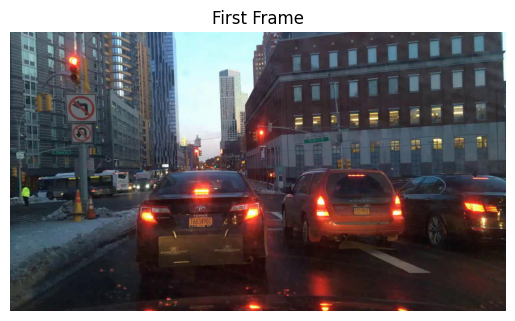

In [ ]:
import cv2
import matplotlib.pyplot as plt

video_path = 'normal/002980.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total number of frames: {total_frames}")
    ret, frame = cap.read()

    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        plt.imshow(frame_rgb)
        plt.title("First Frame")
        plt.axis('off')  # Hide axis
        plt.show()
    else:
        print("Error: Could not read the first frame.")

    cap.release()

In [ ]:
!ls normal

000001.mp4  000376.mp4	000751.mp4  001126.mp4	001501.mp4  001876.mp4	002251.mp4  002626.mp4
000002.mp4  000377.mp4	000752.mp4  001127.mp4	001502.mp4  001877.mp4	002252.mp4  002627.mp4
000003.mp4  000378.mp4	000753.mp4  001128.mp4	001503.mp4  001878.mp4	002253.mp4  002628.mp4
000004.mp4  000379.mp4	000754.mp4  001129.mp4	001504.mp4  001879.mp4	002254.mp4  002629.mp4
000005.mp4  000380.mp4	000755.mp4  001130.mp4	001505.mp4  001880.mp4	002255.mp4  002630.mp4
000006.mp4  000381.mp4	000756.mp4  001131.mp4	001506.mp4  001881.mp4	002256.mp4  002631.mp4
000007.mp4  000382.mp4	000757.mp4  001132.mp4	001507.mp4  001882.mp4	002257.mp4  002632.mp4
000008.mp4  000383.mp4	000758.mp4  001133.mp4	001508.mp4  001883.mp4	002258.mp4  002633.mp4
000009.mp4  000384.mp4	000759.mp4  001134.mp4	001509.mp4  001884.mp4	002259.mp4  002634.mp4
000010.mp4  000385.mp4	000760.mp4  001135.mp4	001510.mp4  001885.mp4	002260.mp4  002635.mp4
000011.mp4  000386.mp4	000761.mp4  001136.mp4	001511.mp4  001886.mp4	002261.mp4 

I want to prepare training dataset for classification.
There a two classes: accident and noaccident.
So the dataset should be organized as:
split/class/<video_id>/001.jpg .. 044.jpg
Example from tree looks like (all video id are like this but they are unique):
data
├── test
│   ├── accident
│   │   ├── 000001
│   │   ├── 000002
│   │   ├── 000003
In order to prepare a dataset like this I will use another dataset that is organized in a different way.


I have two folders:
crash:
  000001.mp4 ... 001500.mp4
normal:
  000001.mp4 ... 003000.mp4

Each video file has 50 frames.
I need 45.
I want you to use 1400 videos from crash to make ds/train/accident/000001 .. 0001400 folders with last 45 frames extracted and named 001.jpg ... as in original dataset.
Other 100 use for ds/test/accident

Then use normal to generate ds/train and ds/test. Only take 1500 videos. But make sure that you use other id (consistent with my previous videos). Write script to generate this new dataset.

# Dataset with negative samples

In [ ]:
import os
import cv2
from tqdm import tqdm

In [ ]:
def extract_frames(video_path, output_folder, start_frame, end_frame):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if total_frames < end_frame:
        print(f"Warning: Video {video_path} has less than {end_frame} frames.")
        end_frame = total_frames

    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    for i in range(start_frame, end_frame):
        ret, frame = cap.read()
        if not ret:
            break
        frame_filename = f"{i - start_frame + 1:03d}.jpg"
        frame_path = os.path.join(output_folder, frame_filename)
        cv2.imwrite(frame_path, frame)

    cap.release()

In [ ]:
def process_videos(video_folder, output_base_folder, video_ids, split, class_name, start_counter):
    counter = start_counter
    for video_id in tqdm(video_ids):
        video_path = os.path.join(video_folder, video_id)
        output_folder = os.path.join(output_base_folder, split, class_name, f"{counter:06d}")
        os.makedirs(output_folder, exist_ok=True)
        extract_frames(video_path, output_folder, start_frame=5, end_frame=50)
        counter += 1
    return counter

In [ ]:
crash_folder = 'crash'
normal_folder = 'normal'
output_base_folder = 'ds'

counter = 1
crash_video_ids_train = sorted(os.listdir(crash_folder))[:1400]
crash_video_ids_test = sorted(os.listdir(crash_folder))[1400:1500]

counter = process_videos(crash_folder, output_base_folder, crash_video_ids_train, split='train', class_name='accident', start_counter=counter)
process_videos(crash_folder, output_base_folder, crash_video_ids_test, split='test', class_name='accident', start_counter=counter)

normal_video_ids_train = sorted(os.listdir(normal_folder))[:1400]
normal_video_ids_test = sorted(os.listdir(normal_folder))[1400:1500]

counter = process_videos(normal_folder, output_base_folder, normal_video_ids_train, split='train', class_name='noaccident', start_counter=counter)
process_videos(normal_folder, output_base_folder, normal_video_ids_test, split='test', class_name='noaccident', start_counter=counter)

 44%|████▍     | 614/1400 [02:38<03:22,  3.88it/s]

100%|██████████| 100/100 [00:25<00:00,  3.89it/s]


2901

In [ ]:
!apt install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (55.0 kB/s)
Selecting previously unselected package tree.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!tree -d 3 ds

3  [error opening dir]
ds
├── test
│   ├── accident
│   │   ├── 001401
│   │   ├── 001402
│   │   ├── 001403
│   │   ├── 001404
│   │   ├── 001405
│   │   ├── 001406
│   │   ├── 001407
│   │   ├── 001408
│   │   ├── 001409
│   │   ├── 001410
│   │   ├── 001411
│   │   ├── 001412
│   │   ├── 001413
│   │   ├── 001414
│   │   ├── 001415
│   │   ├── 001416
│   │   ├── 001417
│   │   ├── 001418
│   │   ├── 001419
│   │   ├── 001420
│   │   ├── 001421
│   │   ├── 001422
│   │   ├── 001423
│   │   ├── 001424
│   │   ├── 001425
│   │   ├── 001426
│   │   ├── 001427
│   │   ├── 001428
│   │   ├── 001429
│   │   ├── 001430
│   │   ├── 001431
│   │   ├── 001432
│   │   ├── 001433
│   │   ├── 001434
│   │   ├── 001435
│   │   ├── 001436
│   │   ├── 001437
│   │   ├── 001438
│   │   ├── 001439
│   │   ├── 001440
│   │   ├── 001441
│   │   ├── 001442
│   │   ├── 001443
│   │   ├── 001444
│   │   ├── 001445
│   │   ├── 001446
│   │   ├── 001447
│   │   ├── 001448
│   │   ├── 001449
│   │   ├── 00145

In [ ]:
!ls ds/test/noaccident/

002801	002810	002819	002828	002837	002846	002855	002864	002873	002882	002891	002900
002802	002811	002820	002829	002838	002847	002856	002865	002874	002883	002892
002803	002812	002821	002830	002839	002848	002857	002866	002875	002884	002893
002804	002813	002822	002831	002840	002849	002858	002867	002876	002885	002894
002805	002814	002823	002832	002841	002850	002859	002868	002877	002886	002895
002806	002815	002824	002833	002842	002851	002860	002869	002878	002887	002896
002807	002816	002825	002834	002843	002852	002861	002870	002879	002888	002897
002808	002817	002826	002835	002844	002853	002862	002871	002880	002889	002898
002809	002818	002827	002836	002845	002854	002863	002872	002881	002890	002899


In [ ]:
!ls

 CarCrash	        Crash-1500.txt	 data.zip   incident_detection	 sample_data
'CarCrash Aug 12.zip'   Crash-1500.zip	 drive	    normal
 crash		        data		 ds	    Normal.zip


In [ ]:
!mv ds incident_detection

In [ ]:
%cd incident_detection

/content/incident_detection


In [ ]:
!ls

dataset.py  demo.py  ds  model.py  README.md  run_incident_detection.ipynb  train.py  weights


/bin/bash: line 1: train: command not found


In [ ]:
!zip -r ds_ego.zip ds

Streaming output truncated to the last 5000 lines.
  adding: ds/train/noaccident/002091/025.jpg (deflated 1%)
  adding: ds/train/noaccident/002091/009.jpg (deflated 1%)
  adding: ds/train/noaccident/002091/016.jpg (deflated 1%)
  adding: ds/train/noaccident/002091/005.jpg (deflated 1%)
  adding: ds/train/noaccident/002091/003.jpg (deflated 1%)
  adding: ds/train/noaccident/002091/029.jpg (deflated 1%)
  adding: ds/train/noaccident/002091/036.jpg (deflated 1%)
  adding: ds/train/noaccident/002091/002.jpg (deflated 1%)
  adding: ds/train/noaccident/002091/021.jpg (deflated 1%)
  adding: ds/train/noaccident/002091/023.jpg (deflated 1%)
  adding: ds/train/noaccident/002091/034.jpg (deflated 1%)
  adding: ds/train/noaccident/002091/001.jpg (deflated 1%)
  adding: ds/train/noaccident/002091/042.jpg (deflated 0%)
  adding: ds/train/noaccident/002091/043.jpg (deflated 0%)
  adding: ds/train/noaccident/002091/015.jpg (deflated 0%)
  adding: ds/train/noaccident/002091/035.jpg (deflated 1%)
  add

In [ ]:
!cp ds_ego.zip /content/drive/MyDrive/incident_detection

In [ ]:
!python3 train.py --help

In [ ]:
!ls /content/drive/MyDrive/incident_detection

/content/drive/MyDrive/incident_detection


In [ ]:
!cp ds_ego.zip /content/drive/MyDrive/incident

In [ ]:
!pip install warmup_scheduler

  Preparing metadata (setup.py) ... done
  Created wheel for warmup_scheduler: filename=warmup_scheduler-0.3-py3-none-any.whl size=2968 sha256=849ee2d2a7a52a067f0ded22f00a9cfe7dbfcc8116935650dc3d04790429373a
  Stored in directory: /root/.cache/pip/wheels/59/01/9e/d1820991c32916e9808c940f572b462f3e46427f3e76c4d852
Successfully built warmup_scheduler


In [ ]:
!ls ./ds

test  train


In [77]:
!python3 train.py --data_root="./ds"

[info] There are 2800 videos in the dataset
[info] There are 200 videos in the dataset
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt101_32X8D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt101_32X8D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth" to /root/.cache/torch/hub/checkpoints/resnext101_32x8d-8ba56ff5.pth
100% 340M/340M [00:01<00:00, 199MB/s]
100% 350/350 [18:31<00:00,  3.17s/it]
Epoch [1/25], Loss: 0.7704736495018005
100% 25/25

In [85]:
!cp best_model.pth /content/drive/MyDrive/incident/best_model1.pth

In [86]:
!ls /content/drive/MyDrive/incident/

 best_model1.pth  'CarCrash Aug 12.zip'   dota	 ds_ego.zip
